## Data_Validation report

## Step 1: Import Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

## Step 2: Load Data

In [47]:
# Load cleaned data
df = pd.read_csv('fisheries_data_ml_ready.csv')

print(f"Total Records: {len(df):,}")
print(f"Countries: {df['Country Name'].nunique()}")
print(f"Year Range: {df['Year'].min()} to {df['Year'].max()}")

df.head()

Total Records: 15,906
Countries: 264
Year Range: 1963 to 2023


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Production,Production_Lag1,Production_Lag2,Production_Lag3,YoY_Change,Rolling_Mean_3Y
0,Afghanistan,AFG,Total fisheries production (metric tons),ER.FSH.PROD.MT,1963,300.0,300.0,300.0,200.0,0.000000,300.000000
1,Afghanistan,AFG,Total fisheries production (metric tons),ER.FSH.PROD.MT,1964,300.0,300.0,300.0,300.0,0.000000,300.000000
2,Afghanistan,AFG,Total fisheries production (metric tons),ER.FSH.PROD.MT,1965,300.0,300.0,300.0,300.0,0.000000,300.000000
3,Afghanistan,AFG,Total fisheries production (metric tons),ER.FSH.PROD.MT,1966,300.0,300.0,300.0,300.0,0.000000,300.000000
4,Afghanistan,AFG,Total fisheries production (metric tons),ER.FSH.PROD.MT,1967,400.0,300.0,300.0,300.0,0.333333,333.333333


## Step 3: Data Overview

In [50]:
# Check data structure
print("Dataset Information:")
print(df.info())

print("\nBasic Statistics:")
df[['Year', 'Production']].describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15906 entries, 0 to 15905
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     15906 non-null  object 
 1   Country Code     15906 non-null  object 
 2   Indicator Name   15906 non-null  object 
 3   Indicator Code   15906 non-null  object 
 4   Year             15906 non-null  int64  
 5   Production       15906 non-null  float64
 6   Production_Lag1  15906 non-null  float64
 7   Production_Lag2  15906 non-null  float64
 8   Production_Lag3  15906 non-null  float64
 9   YoY_Change       14745 non-null  float64
 10  Rolling_Mean_3Y  15906 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.3+ MB
None

Basic Statistics:


,Year,Production
count,15906.000000,1.590600e+04
mean,1993.026342,4.274953e+06
std,17.536109,1.733783e+07
min,1963.000000,0.000000e+00
25%,1978.000000,3.700000e+03
50%,1993.000000,5.607351e+04
75%,2008.000000,8.534914e+05
max,2023.000000,2.169865e+08


## Step 4: Select features for prediction

In [53]:
features = ['Year', 'Production_Lag1', 'Production_Lag2', 'Production_Lag3', 'Rolling_Mean_3Y']
X = df[features]
y = df['Production']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train):,}")
print(f"Testing samples: {len(X_test):,}")
print(f"\nFeatures used: {features}")

Training samples: 12,724
Testing samples: 3,182

Features used: ['Year', 'Production_Lag1', 'Production_Lag2', 'Production_Lag3', 'Rolling_Mean_3Y']


## Step 5: Select features for prediction

In [56]:
# Create and train Random Forest model
model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


## Step 6: Make predictions

In [62]:
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance:")
print(f"R-squared Score: {r2:.4f}")
print(f"RMSE: {rmse:,.2f}")
print(f"\nInterpretation: The model explains {r2*100:.2f}% of the variance in production data")

Model Performance:
R-squared Score: 0.9994
RMSE: 425,015.30

Interpretation: The model explains 99.94% of the variance in production data


## Step 7: Feature selection and train/test split

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features for the global model
features = ['Year', 'Production_Lag1', 'Production_Lag2', 'Production_Lag3', 'Rolling_Mean_3Y']
X = df[features]
y = df['Production']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train):,}")
print(f"Testing samples: {len(X_test):,}")

# Create and train Random Forest model
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

print("Model trained successfully!")

Training samples: 12,724
Testing samples: 3,182
Model trained successfully!


## Step 8: Calling the needed model Validations

In [68]:
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    
    print("="*60)
    print(f"Model Validation Report: {model_name}")
    print("="*60)

    # Predictions
    train_pred = model.predict(X_train)
    test_pred  = model.predict(X_test)

    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse  = np.sqrt(mean_squared_error(y_test, test_pred))
    train_mae  = mean_absolute_error(y_train, train_pred)
    test_mae   = mean_absolute_error(y_test, test_pred)
    r2 = r2_score(y_test, test_pred)

    print(f"Train RMSE : {train_rmse:.2f}")
    print(f"Test RMSE  : {test_rmse:.2f}")
    print(f"Train MAE  : {train_mae:.2f}")
    print(f"Test MAE   : {test_mae:.2f}")
    print(f"R2 Score   : {r2:.4f}")

    # Overfitting Check
    if train_rmse < test_rmse:
        print("⚠ Possible Overfitting Detected")
    else:
        print("Model Generalization Looks Stable")

    # Residual Analysis
    residuals = y_test - test_pred
    print(f"Residual Mean: {residuals.mean():.4f}")
    print(f"Residual Std : {residuals.std():.4f}")

    # Residual Plot
    plt.figure(figsize=(6,4))
    plt.scatter(test_pred, residuals)
    plt.axhline(0, color='red')
    plt.title(f"Residual Plot - {model_name}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

    return {
        "Model": model_name,
        "Train_RMSE": train_rmse,
        "Test_RMSE": test_rmse,
        "Train_MAE": train_mae,
        "Test_MAE": test_mae,
        "R2": r2
    }

Model Validation Report: Random Forest
Train RMSE : 271606.86
Test RMSE  : 479487.51
Train MAE  : 56469.11
Test MAE   : 98421.18
R2 Score   : 0.9992
⚠ Possible Overfitting Detected
Residual Mean: 6494.8400
Residual Std : 479518.8733


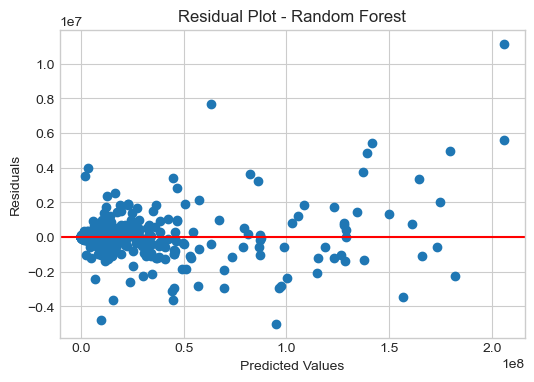

In [70]:
model.fit(X_train, y_train)

results = evaluate_model(
    model,
    "Random Forest",
    X_train,
    y_train,
    X_test,
    y_test
)